# **A Recommendation system** from  Steam database to give recommemdations of Games for User

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('steam-200k.csv')
data

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


## Rearranging/ Renaming the data frame

In [3]:
cols = {'151603712':'Game_id','The Elder Scrolls V Skyrim':'Game_name','purchase':'Game_status','1.0':'Hourplayed'}
data.rename(columns = cols,inplace =True)

In [4]:
data.head()

,Game_id,Game_name,Game_status,Hourplayed,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [5]:
# Removing that invalid column
data.drop(['0'], axis = 1, inplace = True)

In [6]:
data.head()

,Game_id,Game_name,Game_status,Hourplayed
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9


In [7]:
print(data.shape)
print(data.duplicated().value_counts())

(199999, 4)
False    199292
True        707
Name: count, dtype: int64


In [8]:
# Removing droplicate rows
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(199292, 4)

In [10]:
data.describe()

,Game_id,Hourplayed
count,1.992920e+05,199292.000000
mean,1.037179e+08,17.934332
std,7.212058e+07,138.298294
min,5.250000e+03,0.100000
25%,4.738430e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.400000
max,3.099031e+08,11754.000000


In [11]:
print(data.nunique())
print(data.info())

Game_id        12393
Game_name       5155
Game_status        2
Hourplayed      1593
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 199292 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Game_id      199292 non-null  int64  
 1   Game_name    199292 non-null  object 
 2   Game_status  199292 non-null  object 
 3   Hourplayed   199292 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ MB
None


In [12]:
# List of Games
# data['Game_name'].unique().tolist()

In [13]:
# Top 10 most played games
sum1 = data.groupby('Game_name')['Hourplayed'].sum().nlargest(10)
sum1

Game_name
Dota 2                                         986525.6
Counter-Strike Global Offensive                324183.6
Team Fortress 2                                175996.3
Counter-Strike                                 135117.1
Sid Meier's Civilization V                     100417.3
Counter-Strike Source                           97053.5
The Elder Scrolls V Skyrim                      71605.3
Garry's Mod                                     50456.3
Call of Duty Modern Warfare 2 - Multiplayer     42352.9
Left 4 Dead 2                                   34547.7
Name: Hourplayed, dtype: float64

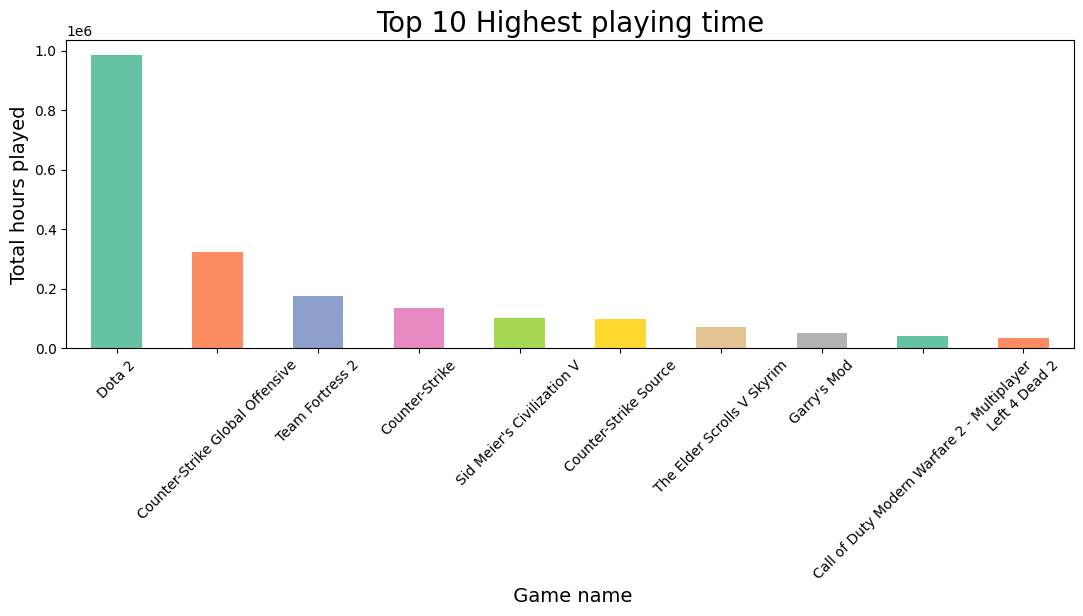

In [14]:
plt.figure(figsize =(13,4))
sum1.plot(kind='bar',color=sns.color_palette("Set2"))
plt.title('Top 10 Highest playing time', fontsize = 20)
plt.xlabel(' Game name', fontsize = 14)
plt.ylabel('Total hours played', fontsize =14)
plt.xticks(rotation = 45)
plt.show()


In [15]:
sum2 = data.groupby('Game_status')['Hourplayed'].sum()
sum2

Game_status
play        3445365.8
purchase     128803.0
Name: Hourplayed, dtype: float64

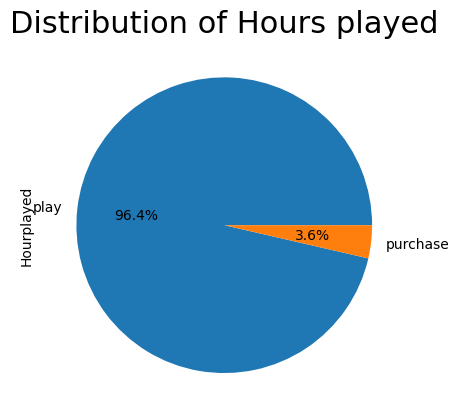

In [16]:
sum2.plot(kind='pie', color=sns.color_palette("Set2"), autopct = '%1.1f%%')
plt.title('Distribution of Hours played', fontsize = 22)
plt.show()

In [17]:
data['Game_status'].value_counts()

Game_status
purchase    128803
play         70489
Name: count, dtype: int64

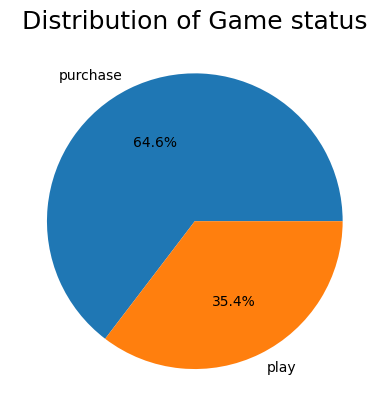

In [18]:
labelling = ['purchase', 'play']
plt.pie(data['Game_status'].value_counts(), labels = labelling, autopct = '%1.1f%%')
plt.title('Distribution of Game status', fontsize = 18)
plt.show()

## We will filter out users that only played a game less than 2 hours (for accuracy)

In [19]:
b = data['Hourplayed'].value_counts().sum()        # Before filtering
print( f'Before filtering {b}')

Before filtering 199292


In [20]:
data = data[(data['Hourplayed']>=2) & (data['Game_status'] == 'play')] 
a = data['Hourplayed'].value_counts().sum()         # After filtering
print( f'After filtering {a}')

After filtering 45535


In [21]:
average = data.groupby(['Game_name'])['Hourplayed'].mean()
average = pd.DataFrame(average)
average.rename(columns = {'Hourplayed':'Avg_Hourplayed'},inplace =True)

In [22]:
average.head()

,Avg_Hourplayed
Game_name,
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),6.20
10 Second Ninja,5.40
"10,000,000",3.60
100% Orange Juice,17.90
12 Labours of Hercules,5.75


In [23]:
data = data.merge(average,on = 'Game_name')
data

,Game_id,Game_name,Game_status,Hourplayed,Avg_Hourplayed
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792
1,151603712,Fallout 4,play,87.0,66.819876
2,151603712,Spore,play,14.9,37.708889
3,151603712,Fallout New Vegas,play,12.1,62.910638
4,151603712,Left 4 Dead 2,play,8.9,50.333684
...,...,...,...,...,...
45530,128470551,Nether,play,2.8,13.705556
45531,128470551,Rogue Legacy,play,2.6,18.191489
45532,128470551,Mortal Kombat Komplete Edition,play,2.5,28.962222
45533,128470551,Fallen Earth,play,2.4,124.770000


### We will add another column for simplicity... A 'Rating' column....We make use of pd.cut

In [24]:
 #Define the bins and labels
bins = [-float('inf'), 0.2, 0.4, 0.6, 0.8, float('inf')]           # Define the ranges for categorization.
labelling = [1, 2, 3, 4, 5]                                           # rating values you assign for each bin or range.

# Create the 'rating' column
data['Rating'] = pd.cut(data['Hourplayed'] / data['Avg_Hourplayed'], bins=bins, labels=labelling, right=False).astype(int)

In [25]:
data.head()

,Game_id,Game_name,Game_status,Hourplayed,Avg_Hourplayed,Rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,151603712,Fallout 4,play,87.0,66.819876,5
2,151603712,Spore,play,14.9,37.708889,2
3,151603712,Fallout New Vegas,play,12.1,62.910638,1
4,151603712,Left 4 Dead 2,play,8.9,50.333684,1


In [26]:
# To find the average rating of the games...(in a new DataFrame)
final_data = pd.DataFrame(data.groupby('Game_name')['Rating'].mean())
final_data.head()

,Rating
Game_name,
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),4.0
10 Second Ninja,5.0
"10,000,000",5.0
100% Orange Juice,3.0
12 Labours of Hercules,4.5


### We will add a new column (number of ratings) to our final dataset

In [27]:
# We will add a new column (number of ratings) to our dataset
final_data['No of Ratings'] = pd.DataFrame(data.groupby('Game_name')['Rating'].count())   # We have added 'No of ratings' to the dataset
final_data.head()

,Rating,No of Ratings
Game_name,,
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),4.0,3
10 Second Ninja,5.0,1
"10,000,000",5.0,1
100% Orange Juice,3.0,4
12 Labours of Hercules,4.5,6


In [28]:
# Removing unnneccesary columns from our our first dataset
data.drop(['Game_status','Hourplayed','Avg_Hourplayed'],axis = 1, inplace = True)

In [29]:
data.head()

,Game_id,Game_name,Rating
0,151603712,The Elder Scrolls V Skyrim,5
1,151603712,Fallout 4,5
2,151603712,Spore,2
3,151603712,Fallout New Vegas,1
4,151603712,Left 4 Dead 2,1


# Exploratory Data Analysis

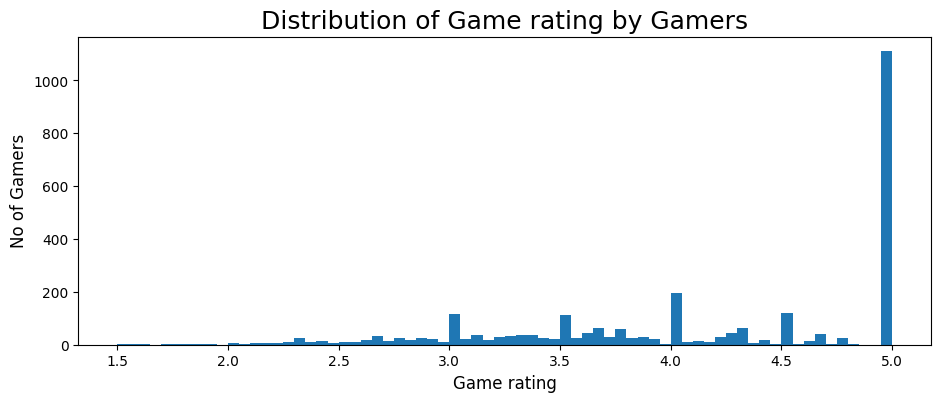

In [30]:
plt.figure(figsize=(11,4))
plt.hist(final_data['Rating'], bins= 70)
plt.title('Distribution of Game rating by Gamers', fontsize = 18)
plt.xlabel('Game rating', fontsize = 12)
plt.ylabel('No of Gamers', fontsize = 12)
plt.show()

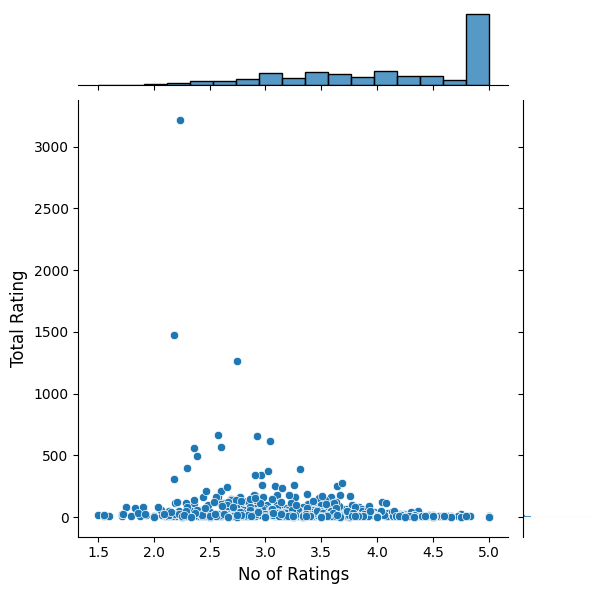

In [31]:
sns.jointplot(x = 'Rating', y = 'No of Ratings', data = final_data)
plt.xlabel('No of Ratings', fontsize = 12)
plt.ylabel('Total Rating', fontsize = 12)
plt.show()

In [32]:
# To see the most rated Games
final_data.sort_values('No of Ratings', ascending = False) .head(10)

,Rating,No of Ratings
Game_name,,
Dota 2,2.235459,3215
Team Fortress 2,2.183604,1476
Counter-Strike Global Offensive,2.749407,1265
Left 4 Dead 2,2.572932,665
Unturned,2.920852,657
The Elder Scrolls V Skyrim,3.037459,614
Garry's Mod,2.599297,569
Counter-Strike Source,2.359571,559
Sid Meier's Civilization V,2.389113,496


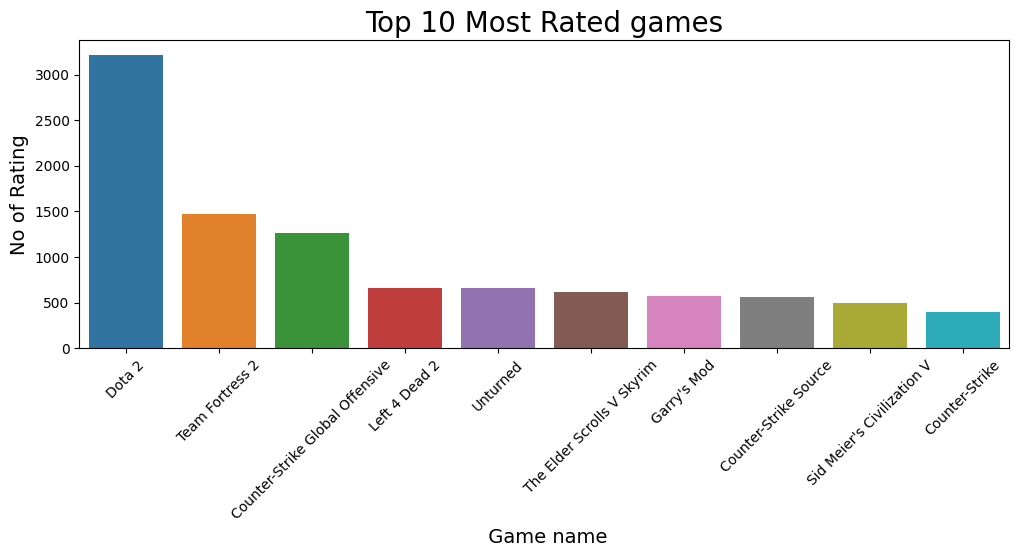

In [33]:
plt.figure(figsize = (12,4))
sns.barplot(x='Game_name', y = 'No of Ratings', hue = 'Game_name', data = final_data.sort_values('No of Ratings', ascending = False) .head(10))
plt.title('Top 10 Most Rated games', fontsize = 20)
plt.xlabel(' Game name', fontsize = 14)
plt.ylabel('No of Rating', fontsize =14)
plt.xticks(rotation = 45)
plt.show()

# **Data Preprocessing**

- We will create a table that has Game_id as index and all the Game name as column and the content is the 'Rating' of the Game by the user.  
- NOTE: the Games that were not rated by user will have empty spaces (NaN)....

In [34]:
gamelist = data.pivot_table(index='Game_id', columns = 'Game_name', values= 'Rating')
gamelist.head()

Game_name,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,140,16bit Trader,18 Wheels of Steel American Long Haul,...,iBomber Defense,iBomber Defense Pacific,ibb & obb,liteCam Game 100 FPS Game Capture,rFactor,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,sZone-Online,theHunter,theHunter Primal
Game_id,,,,,,,,,,,,,,,,,,,,,
5250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
fallout_4_rating = gamelist['Fallout 4']
fallout_4_rating

Game_id
5250         NaN
76767        NaN
86540        NaN
229911       NaN
298950       5.0
            ... 
309255941    NaN
309265377    NaN
309404240    NaN
309554670    NaN
309626088    NaN
Name: Fallout 4, Length: 8629, dtype: float64

##  We have to get rid of those who have never played certain games in our outputs that is the Nan\empty spaces.

In [36]:
similiar = gamelist.corrwith(fallout_4_rating)    # The code will be an error because of the empty spaces in the dataset so we get rid of them

C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [37]:
# To remove the null values\empty spaces
corr_fallout_4 = pd.DataFrame(similiar, columns = ['Correlation'])   
corr_fallout_4.dropna(inplace = True)
corr_fallout_4.head()


,Correlation
Game_name,
3DMark,-0.904534
7 Days to Die,-0.103853
APB Reloaded,0.653710
ARK Survival Evolved,0.215156
Ace of Spades,0.333333


In [38]:
corr_fallout_4.sort_values('Correlation', ascending = False).head(10) #Sorting values by correlation, displaying the top 10

,Correlation
Game_name,
Demigod,1.0
Grand Theft Auto III,1.0
Heroes of Might & Magic V,1.0
The Settlers 7 Paths to a Kingdom - Gold Edition,1.0
Reassembly,1.0
Take On Mars,1.0
Pro Evolution Soccer 2015,1.0
Crysis,1.0
Magic The Gathering - Duels of the Planeswalkers 2013,1.0


### The correlation is 1.0 because there are users that only played fallout 4  and ONE other game

In [39]:
Gamers = data['Game_id'].nunique()
Games = data['Game_name'].nunique()
print(f'We have {Gamers} Gamers')
print(f'We have {Games} different games')

We have 8629 Gamers
We have 2800 different games


### We solve this by filtering out Games with less than 70 user ratings...(70 is okay becuase of the distribution of our dataset(visually seen in the histogram)

In [40]:
# Add 'No of Ratings to the fallout_correlation set so we can sort and get the best matches
corr_fallout_4 = corr_fallout_4.join(final_data['No of Ratings'])   # Another way of adding a column to a dataframe.
corr_fallout_4.head()

,Correlation,No of Ratings
Game_name,,
3DMark,-0.904534,10
7 Days to Die,-0.103853,80
APB Reloaded,0.653710,81
ARK Survival Evolved,0.215156,128
Ace of Spades,0.333333,46


In [41]:
# To filter games that have less than 90 user ratings for accuracy
recommend = corr_fallout_4[corr_fallout_4['No of Ratings']>70]
recommend.head()

,Correlation,No of Ratings
Game_name,,
7 Days to Die,-0.103853,80
APB Reloaded,0.653710,81
ARK Survival Evolved,0.215156,128
AdVenture Capitalist,-0.654171,89
Age of Empires II HD Edition,-0.284561,164


In [42]:
# Sorting the values
print('The Top 6 recommendation for Fallout 4 are shown below: ')
recommend.sort_values('Correlation', ascending = False).head(10)

The Top 6 recommendation for Fallout 4 are shown below: 


,Correlation,No of Ratings
Game_name,,
Fallout 4,1.000000,161
APB Reloaded,0.653710,81
Mafia II,0.639517,97
Neverwinter,0.622807,100
Robocraft,0.596462,241
Starbound,0.536545,117
Heroes & Generals,0.502345,136
The Walking Dead,0.489771,94
Arma 3,0.489357,144


# Recommendation Process: Recommendation of Games after "Team Fortress 2"

In [43]:
def recommend(game, gamelist, final_data):
    # Search for the selected game in the dataset, ignoring case and handling missing values
    rating = gamelist[game]
    # If the game  is not found, display the message 
    if rating.empty:
        print("Game not found.")
        return None
    similiar = gamelist.corrwith(rating)
    # To create a new data frame grouping similiar by the correlation
    corr = pd.DataFrame(similiar, columns = ['Correlation'])
    # To remove the null values\empty spaces
    corr.dropna(inplace = True)
    # To join the 'No of ratings' column to the dataframe
    corr = corr.join(final_data['No of Ratings'])
    # To filter games that have less than 70 user ratings
    recommend = corr[corr['No of Ratings']>70]
    # Return the top 10 recommendations
    return recommend.sort_values('Correlation', ascending = False).head(10)

# The Recommendation process can be carried out for any Game in the dataset

In [45]:
# Example with 'team fortress 2'
game = "Team Fortress 2"  
top_recommendations = recommend(game, gamelist, final_data)

# If recommendations are found, print them
if top_recommendations is not None:
    print("Recommended Games")
top_recommendations

C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\oshev\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Recommended Games


,Correlation,No of Ratings
Game_name,,
Team Fortress 2,1.000000,1476
Football Manager 2015,0.636364,75
Mafia II,0.562349,97
Borderlands,0.388876,121
Orcs Must Die! 2,0.361242,71
Deus Ex Human Revolution,0.353478,102
Call of Duty Modern Warfare 3,0.329679,176
Call of Duty Black Ops,0.304424,186
Tomb Raider,0.294533,171
